### Дополнительное задание для работы с курсовым проектом:
__(Необязательно выполнять, но очень желательно)__

Работайте с данные из соревнования.

Примените модель понижения размерности к вашим данным, визуализируйте их.

Сделайте кластеризацию на тренировочном наборе данных. Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.


In [103]:
import pandas as pd
import numpy as np

RE=pd.read_csv('train.csv', sep=',')

In [104]:
RE

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [105]:
def trans_binAB(field):
    RE[field+'_d'] = pd.get_dummies(RE[field]).B
    RE.drop(field , axis=1, inplace=True)
    RE.rename(({field+'_d':field}), axis='columns', inplace=True)

In [106]:
trans_binAB('Shops_2')
trans_binAB('Ecology_2')
trans_binAB('Ecology_3')

In [107]:
RE.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Price               0
Shops_2             0
Ecology_2           0
Ecology_3           0
dtype: int64

**Считаем что LifeSquare (жилая площадь) коррелируется с признаком Square (общая площадь) и его можно удалить**

In [108]:
RE.drop('LifeSquare', axis=1, inplace=True)

**Заполним пропуски Healthcare_1 медианой**

In [109]:
HCA1=RE.Healthcare_1.median()
RE.fillna({'Healthcare_1':RE.Healthcare_1.median()}, inplace=True)


In [110]:
X=RE.drop(['Price'], axis=1)
y=RE.Price


In [111]:
RE.describe()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2,Ecology_2,Ecology_3
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399,0.917500,0.990300,0.972500
std,4859.01902,43.587592,0.839512,21.058732,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865,0.275139,0.098015,0.163543
min,0.00000,0.000000,0.000000,1.136859,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


In [112]:
from sklearn.model_selection import train_test_split
# ?train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

>Примените модель понижения размерности к вашим данным, визуализируйте их.


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# return numpy
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [118]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42, n_components=2, learning_rate=500)

X_train_tsne = tsne.fit_transform(X_train_scaled)

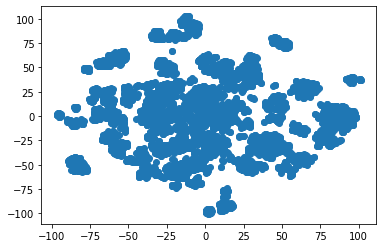

In [119]:
import matplotlib.pyplot as plt

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

>Сделайте кластеризацию на тренировочном наборе данных. 

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
label_train = kmeans.fit_predict(X_train_scaled)

In [124]:
pd.value_counts(label_train)

1    4414
0    2586
dtype: int64

>Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.